# Model fitting

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs


## loading data



In [2]:
print(test_SEDs[1])
data=Data(data_table=test_SEDs[2])


/Users/orion/anaconda3/lib/python3.7/site-packages/jetset-1.0.2-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.dat



***  binning data  ***
---> N bins= 90
---> bin_widht= 0.2



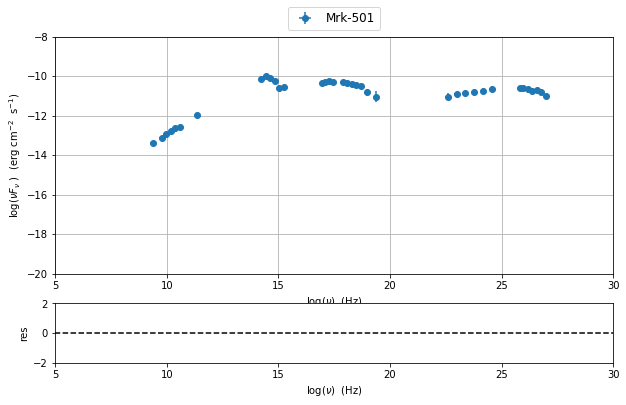

In [3]:
%matplotlib inline
sed_data=ObsData(data_table=data)
sed_data.group_data(bin_width=0.2)

sed_data.add_systematics(0.1,[10.**6,10.**29])
p=sed_data.plot_sed()

## phenomenological model constraining

### spectral indices


*** evaluating spectral indices for data ***
---> initial range for index radio  set to [6.000000,10.000000]
---> range for index radio updated  to [6.000000,10.000000]
---> name = radio            range=[6.000 ,10.000] log(Hz)  photon.val=-1.295207e+00, err=1.359752e-01 

---> initial range for index radio_mm  set to [10.000000,11.000000]
---> range for index radio_mm updated  to [10.000000,11.000000]
---> name = radio_mm         range=[10.000,11.000] log(Hz)  photon.val=-1.455018e+00, err=5.280897e-02 

---> initial range for index mm_IR  set to [11.000000,13.000000]
---> range for index mm_IR updated  to [10.300000,13.700000]
---> name = mm_IR            range=[10.300,13.700] log(Hz)  photon.val=-1.296277e+00, err=3.749588e-02 

---> initial range for index IR_Opt  set to [13.000000,14.000000]
---> range for index IR_Opt updated  to [12.300000,14.700000]
---> name = IR_Opt           range=[12.300,14.700] log(Hz)  photon.val=-2.087455e+00, err=5.433975e-01 

---> initial range for i

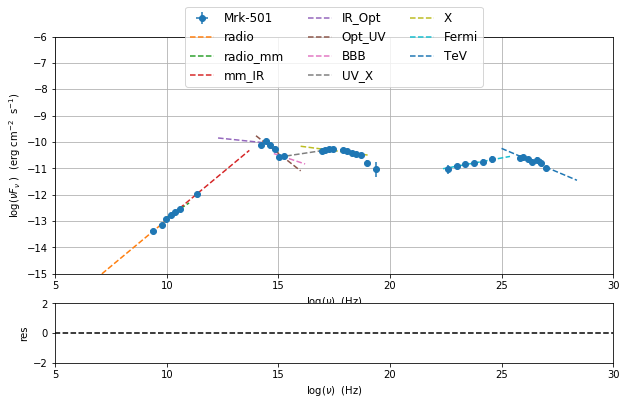

In [4]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices()
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

### sed shaper

In [5]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=True,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10,21])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 b                | curvature            |                  | -1.000000e+00 | [-1.000000e+01,+0.000000e+00] | False 
 c                | third-degree         |                  | -1.000000e+00 | [-1.000000e+01,+1.000000e+01] | False 
 Ep               | peak freq            | Hz               | +1.400000e+01 | [+0.000000e+00,+3.000000e+01] | True 
 Sp               | peak flux            | erg cm^-2 s^-1   | -1.000000e+01 | [-3.000000e+01,+0.000000e+00] | True 
--------------------------------------------------------------

In [6]:
best_fit.show_report()


**************************************************************************************************
Fit report

Model: sync-shape-fit
-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 b                | curvature            |                  | -6.411143e-02 | [-1.000000e+01,+0.000000e+00] | False 
 c                | third-degree         |                  | -1.751704e-03 | [-1.000000e+01,+1.000000e+01] | False 
 Ep               | peak freq            | Hz               | +1.703747e+01 | [+0.000000e+00,+3.000000e+01] | True 
 Sp               | peak flux            | erg cm^-2 s^-1   | -1.030068e+01 | [-3.000000e+01,+0.000000e+00] | True 
 nuFnu_p_host     | nuFnu-scale     


*** Log-Polynomial fitting of the IC component ***
---> fit range: [23, 29]
---> LogCubic fit


FCN = 1.9966189636467242 
 TOTAL NCALL = 216 
 NCALLS = 216 
 
 
 EDM = 9.56312217671091e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,par_0,-0.131096,0.032441,,,-10,0,No
1,par_1,-0.0330031,0.0207252,,,-10,10,No
2,par_2,25.496,0.223556,,,0,30,No
3,par_3,-10.5795,0.0433306,,,-30,0,No



**************************************************************************************************
Fit report

Model: IC-shape-fit
-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 b                | curvature            |                  | -1.310958e-01 | [-1.000000e+01,+0.000000e+00] | False 
 c                | third-degree         |                  | -3.300308e-02 | [-1.000000e+01,+1.000000e+01] | False 
 Ep               | peak freq            | Hz               | +2.549604e+01 | [+0.000000e+00,+3.000000e+01] | True 
 Sp               | peak flux            | erg cm^-2 s^-1   | -1.057946e+01 | [-3.000000e+01,+0.000000e+00] | True 
--------------------------------------

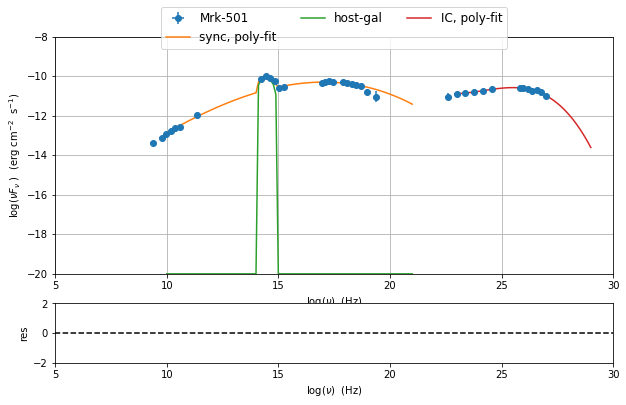

In [7]:
my_shape.IC_fit(fit_range=[23,29],minimizer='minuit')
p=my_shape.plot_sahpe_fit()


### model constraining


***  constrains parameters from observable ***
-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 B                | magnetic_field       | G                | +1.000000e-01 | [+0.000000e+00,No           ] | False 
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 R                | region_size          | cm               | +1.569897e+01 | [+0.000000e+00,+3.000000e+01] | True 
 beam_obj         | beaming              |                  | +1.000000e+01 | [+1.000000e+00,No           ] | False 
 gamma_cut        | turn-over-energy     | Lorentz-factor   | +1.000000e+04 | [+1.000000e+00,+1.000000e+08] | False 
 gma

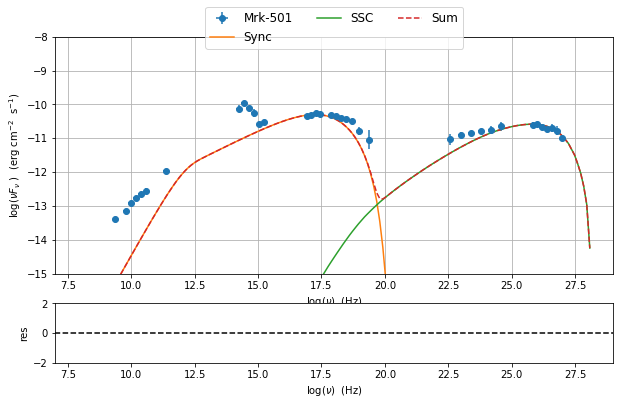

In [8]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='plc',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E12,
                        SEDShape=my_shape)


jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False)
pl=jet.plot_model(sed_data=sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

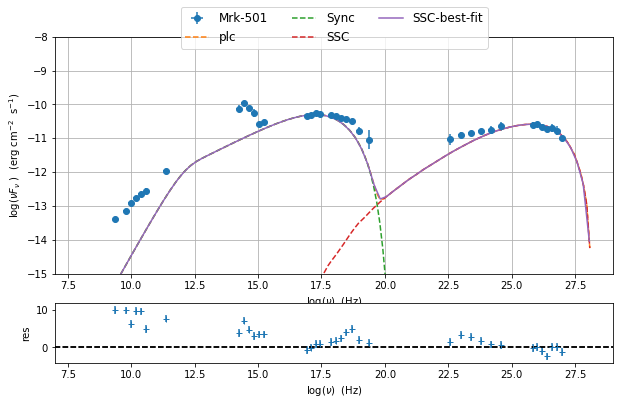

In [9]:



from jetset.model_manager import  FitModel
from jetset.plot_sedfit import PlotSED
jet.set_gamma_grid_size(200)
fit_model=FitModel( jet=jet, name='SSC-best-fit',template=None)
fit_model.eval()
pl=fit_model.plot_model(sed_data=sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)


## Model fitting

In [10]:
from jetset.model_manager import  FitModel

jet.set_gamma_grid_size(200)

fit_model=FitModel( jet=jet, name='SSC-best-fit',template=my_shape.host_gal)
fit_model.freeze('z_cosm')
fit_model.parameters.gmax.fit_range=[1E5,1E8]
fit_model.freeze('R')
fit_model.parameters.nuFnu_p_host.frozen=True
fit_model.parameters.nu_scale.frozen=True
fit_model.show_pars()

model_minimizer,best_fit=fit_SED(fit_model,sed_data,10.0**11.4,10**29.0,fitname='SSC-best-fit',minimizer='lsb')
model_minimizer,best_fit=fit_SED(fit_model,sed_data,10.0**11.4,10**29.0,fitname='SSC-best-fit',minimizer='minuit')

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 B                | magnetic_field       | G                | +3.868794e-03 | [+0.000000e+00,No           ] | False 
 N                | electron_density     | cm^-3            | +1.220832e-01 | [+0.000000e+00,No           ] | False 
 R                | region_size          | cm               | +1.689721e+01 | [+0.000000e+00,+3.000000e+01] | True 
 beam_obj         | beaming              |                  | +2.500000e+01 | [+1.000000e+00,No           ] | False 
 gamma_cut        | turn-over-energy     | Lorentz-factor   | +1.122231e+06 | [+1.000000e+00,+1.000000e+08] | False 
 gmax             | high-energy-cut-off  | Lorentz-f

- minim function calls=270, chisq=24.172502 UL part=-0.000000                                                                                                                                                                                                   

FCN = 11.224647686021614 
 TOTAL NCALL = 271 
 NCALLS = 260 
 
 
 EDM = 1941654.7293684839 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 True 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,par_0,0.00383528,1.22418e-07,,,0,,No
1,par_1,0.072435,0.00135248,,,0,,No
2,par_2,31.8583,0.206364,,,1,,No
3,par_3,2.61095e+06,154824,,,1,1e+08,No
4,par_4,5.65208e+06,705.189,,,100000,1e+08,No
5,par_5,3663.22,0.221918,,,1,100000,No
6,par_6,2.64001,0.005096,,,-10,10,No



**************************************************************************************************
Fit report

Model: SSC-best-fit
-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 B                | magnetic_field       | G                | +3.835280e-03 | [+0.000000e+00,No           ] | False 
 N                | electron_density     | cm^-3            | +7.243498e-02 | [+0.000000e+00,No           ] | False 
 R                | region_size          | cm               | +1.689721e+01 | [+0.000000e+00,+3.000000e+01] | True 
 beam_obj         | beaming              |                  | +3.185827e+01 | [+1.000000e+00,No           ] | False 
 gamma_cut        | turn-over-energy 

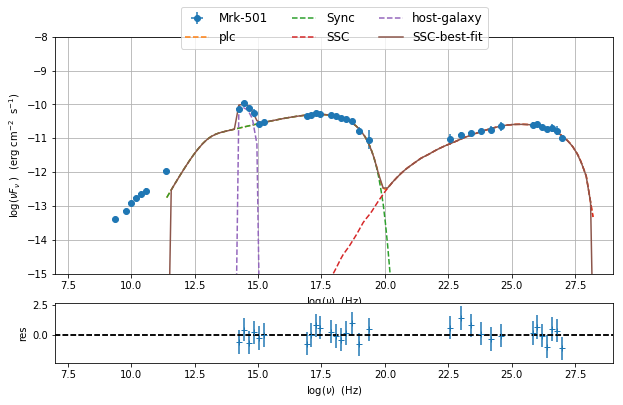

In [11]:
p2=fit_model.plot_model(sed_data=sed_data)
p2.rescale(y_min=-15,x_min=7,x_max=29)

## MCMC sampling

In [12]:
from jetset.mcmc import McmcSampler
jet.set_gamma_grid_size(100)
mcmc=McmcSampler(model_minimizer)
mcmc.run_sampler(nwalkers=150,burnin=10,threads=1,steps=50)

- progress=102.000% calls=7650 accepted=6370

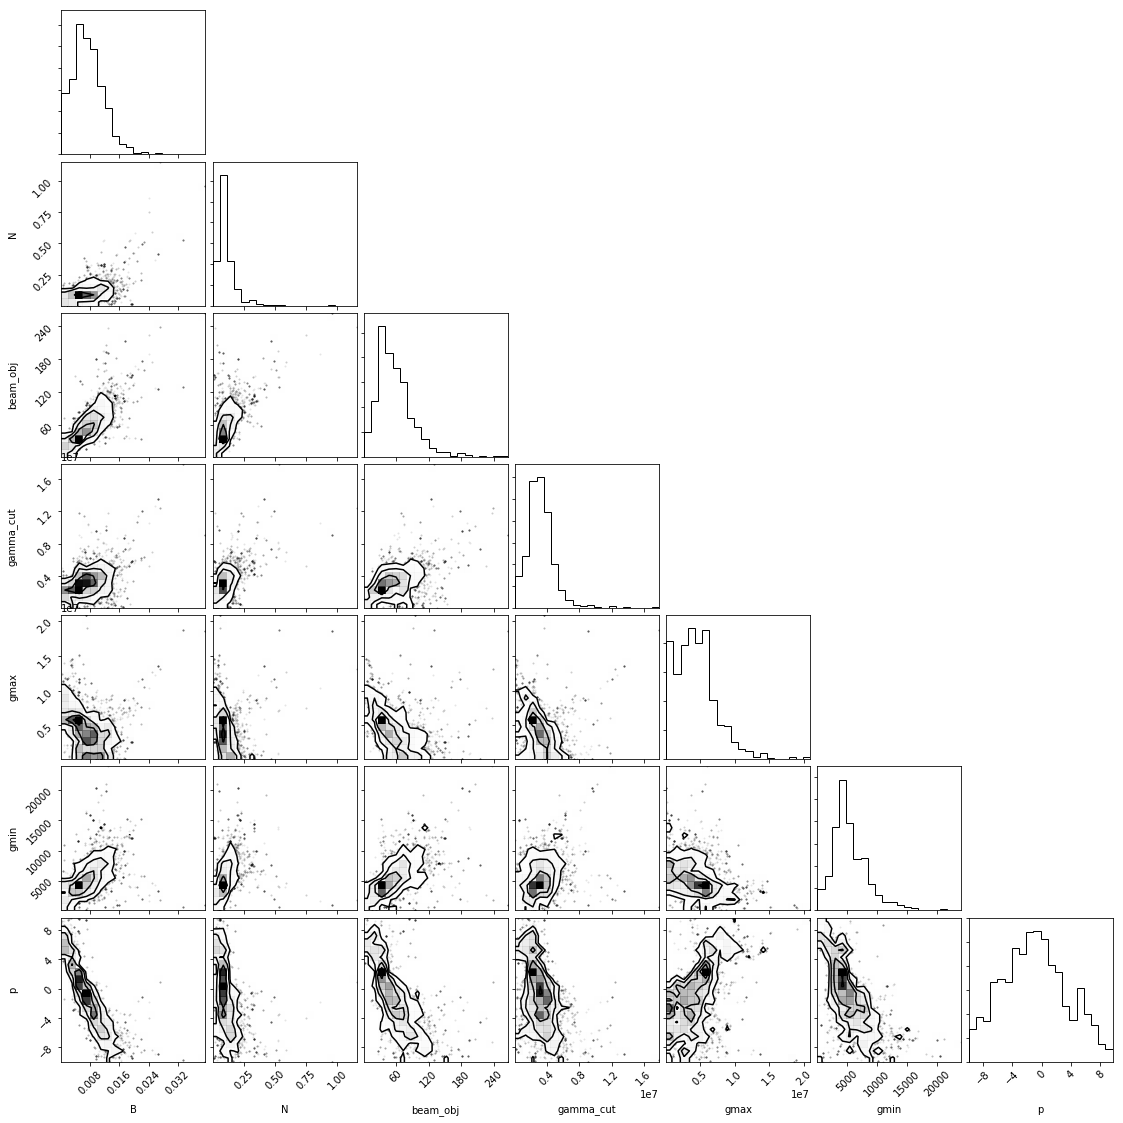

In [13]:
f=mcmc.corner_plot()

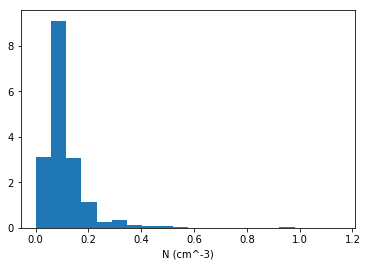

In [14]:
f=mcmc.sampler_out.plot_par('N')

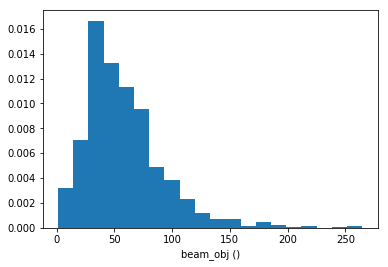

In [15]:
f=mcmc.sampler_out.plot_par('beam_obj')

In [16]:
mcmc.seve_run('test_run')

In [17]:
from jetset.mcmc import SamplerOutput
s=SamplerOutput.from_file('test_run')

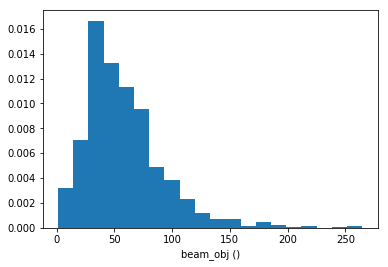

In [18]:
f=s.plot_par('beam_obj',log_plot=False)


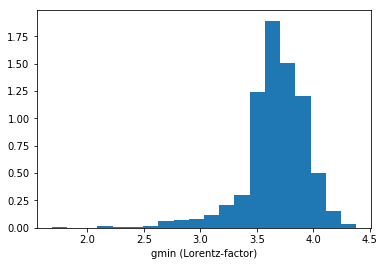

In [19]:
f=s.plot_par('gmin',log_plot=True)


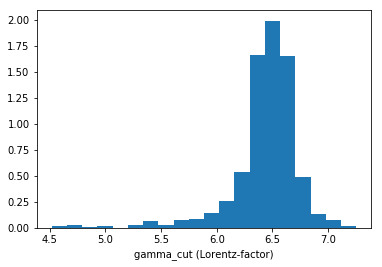

In [20]:
f=s.plot_par('gamma_cut',log_plot=True)
